# Set up

In [1]:
import modin.pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets
import variables
import functions

## Set variables

In [2]:
@ipywidgets.interact
def setState(state=variables.states):
    variables.selected_state = state

interactive(children=(Dropdown(description='state', options=('Aguascalientes', 'Baja California', 'Baja Califo…

In [3]:
@ipywidgets.interact
def setLevel(level=variables.levels):
    variables.selected_level = level

interactive(children=(Dropdown(description='level', options=('Menos de 1 s.m.', '1 salario m¡nimo', 'M s de 2 …

In [4]:
@ipywidgets.interact
def setLevel(genre=variables.genres):
    variables.selected_genre = genre

interactive(children=(Dropdown(description='genre', options=('Hombre', 'Mujer'), value='Hombre'), Output()), _…

In [5]:
@ipywidgets.interact
def setLevel(year=variables.years):
    variables.selected_year = year

interactive(children=(Dropdown(description='year', options=(2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 20…

## Variables

In [6]:
variables.selected_state

'Aguascalientes'

In [7]:
variables.selected_level

'Menos de 1 s.m.'

In [8]:
variables.selected_genre

'Hombre'

In [9]:
variables.selected_year

2005

## Read Data

In [10]:
df = pd.read_csv(variables.file, encoding='ISO-8859-1')
df

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Nivel_ingreso,Numero_personas
0,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,4284
1,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,1 salario m¡nimo,179
2,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 2 hasta 3 s.m.,10503
3,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 3 hasta 5 s.m.,16803
4,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 5 hasta 10 s.m.,1955
...,...,...,...,...,...,...
225721,20190601,Zacatecas,Mujer,45 A 64 A¥OS,No recibe ingresos,136
225722,20190601,Zacatecas,Mujer,45 A 64 A¥OS,No especificado,561
225723,20190601,Zacatecas,Mujer,65 A¥OS Y MAS,Menos de 1 s.m.,1521
225724,20190601,Zacatecas,Mujer,65 A¥OS Y MAS,M s de 3 hasta 5 s.m.,1281


# Change date format

In [11]:
df.insert(0, 'year', 0, True)
df.insert(1, 'month', 0, True)
df.insert(2, 'day', 0, True)
df['year'] = df['Periodo'].astype(str).str.slice(start=0, stop=4)
df['month'] = df['Periodo'].astype(str).str.slice(start=4, stop=6)
df['day'] = df['Periodo'].astype(str).str.slice(start=6, stop=8)
df.insert(0, 'date', df['year'] + '-' + df['month'] + '-' + df['day'])
df.drop(columns='Periodo', inplace=True)

# Cleaning the area

In [12]:
df.rename(columns={'Entidad_Federativa': 'state', 'Sexo': 'sex', 'Grupo_edad': 'age_range', 'Nivel_ingreso': 'level', 'Numero_personas': 'num_people'}, inplace=True)
df = df.dropna();
df

,date,year,month,day,state,sex,age_range,level,num_people
0,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,4284
1,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,1 salario m¡nimo,179
2,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 2 hasta 3 s.m.,10503
3,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 3 hasta 5 s.m.,16803
4,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 5 hasta 10 s.m.,1955
...,...,...,...,...,...,...,...,...,...
225721,2019-06-01,2019,06,01,Zacatecas,Mujer,45 A 64 A¥OS,No recibe ingresos,136
225722,2019-06-01,2019,06,01,Zacatecas,Mujer,45 A 64 A¥OS,No especificado,561
225723,2019-06-01,2019,06,01,Zacatecas,Mujer,65 A¥OS Y MAS,Menos de 1 s.m.,1521
225724,2019-06-01,2019,06,01,Zacatecas,Mujer,65 A¥OS Y MAS,M s de 3 hasta 5 s.m.,1281


In [13]:
df

,date,year,month,day,state,sex,age_range,level,num_people
0,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,4284
1,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,1 salario m¡nimo,179
2,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 2 hasta 3 s.m.,10503
3,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 3 hasta 5 s.m.,16803
4,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 5 hasta 10 s.m.,1955
...,...,...,...,...,...,...,...,...,...
225721,2019-06-01,2019,06,01,Zacatecas,Mujer,45 A 64 A¥OS,No recibe ingresos,136
225722,2019-06-01,2019,06,01,Zacatecas,Mujer,45 A 64 A¥OS,No especificado,561
225723,2019-06-01,2019,06,01,Zacatecas,Mujer,65 A¥OS Y MAS,Menos de 1 s.m.,1521
225724,2019-06-01,2019,06,01,Zacatecas,Mujer,65 A¥OS Y MAS,M s de 3 hasta 5 s.m.,1281


## Filters

In [14]:
less_minimum_salary_filter = df['level'] == variables.less_than_minimum_salary
man_filter = df['sex'] == variables.man
state_filter = df['state'] == variables.selected_state
from_15_to_24_filter = df['age_range'] == variables.from_15_to_24

## Less salary minimum man

In [15]:
less_salary_minimum_man = df.where(less_minimum_salary_filter & man_filter & state_filter & from_15_to_24_filter)
less_salary_minimum_man.dropna(inplace=True)
less_salary_minimum_man

,date,year,month,day,state,sex,age_range,level,num_people
0,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,4284.0
3910,2005-06-01,2005,06,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,5160.0
7788,2005-09-01,2005,09,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,4824.0
11686,2005-12-01,2005,12,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,5096.0
15558,2006-03-01,2006,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,5167.0
19466,2006-06-01,2006,06,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,6556.0
23342,2006-09-01,2006,09,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,6466.0
27276,2006-12-01,2006,12,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,6923.0
31202,2007-03-01,2007,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,5449.0
35120,2007-06-01,2007,06,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,6488.0


In [16]:
less_salary_minimum_man = less_salary_minimum_man.drop(columns=['month', 'day', 'state', 'sex', 'age_range', 'level', 'date'])
less_salary_minimum_man

,year,num_people
0,2005,4284.0
3910,2005,5160.0
7788,2005,4824.0
11686,2005,5096.0
15558,2006,5167.0
19466,2006,6556.0
23342,2006,6466.0
27276,2006,6923.0
31202,2007,5449.0
35120,2007,6488.0


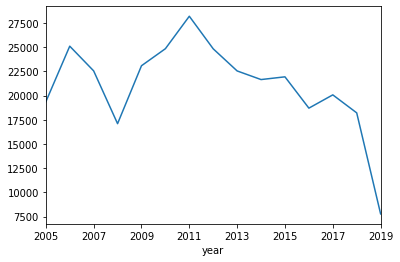

In [17]:
result_less_salary_minimum_man = less_salary_minimum_man.groupby('year').sum()
result_less_salary_minimum_man = result_less_salary_minimum_man.astype(int)

functions.save_image(
    df = result_less_salary_minimum_man['num_people'], 
    image_name = 'less_salary_minimum_man_char_line'
)

In [18]:
result_less_salary_minimum_man

,num_people
year,
2005,19364
2006,25112
2007,22558
2008,17103
2009,23089
2010,24851
2011,28205
2012,24837
2013,22552


# Less salary minimum woman

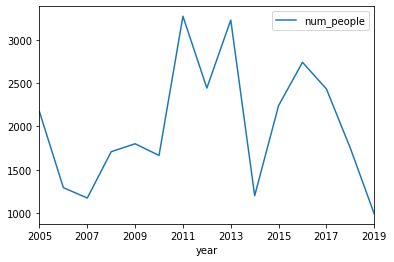

In [19]:
woman_filter = df['sex'] == variables.woman
less_salary_minimum_woman = df.where(less_minimum_salary_filter & woman_filter & state_filter & from_15_to_24_filter)
less_salary_minimum_woman = less_salary_minimum_woman.dropna()
result_less_salary_minimum_woman = less_salary_minimum_woman.groupby('year').sum()

functions.save_image(
    df = result_less_salary_minimum_woman, 
    image_name = 'less_salary_minimum_woman_char_line'
)

In [20]:
result_less_salary_minimum_woman

,num_people
year,
2005,2171.0
2006,1292.0
2007,1172.0
2008,1708.0
2009,1800.0
2010,1665.0
2011,3276.0
2012,2445.0
2013,3232.0


## compare man and woman

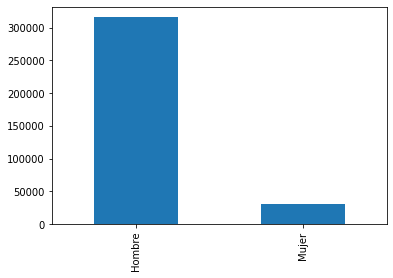

In [21]:
total_less_salary_minimum_woman = result_less_salary_minimum_woman.sum()
total_less_salary_minimum_man = result_less_salary_minimum_man.sum()

bar_chart_less_salary_minimum = pd.Series(
    [
        total_less_salary_minimum_man['num_people'], 
        total_less_salary_minimum_woman['num_people']
    ], 
    index =[variables.man, variables.woman],
    name = 'values'
) 

functions.save_image_bar(
    df = bar_chart_less_salary_minimum, 
    image_name = 'less_salary_minimum_char_bar'
)

In [22]:
df_bar_chart_less_salary_minimum = bar_chart_less_salary_minimum.to_frame()
df_bar_chart_less_salary_minimum.reindex
df_bar_chart_less_salary_minimum.reset_index()
#df_bar_chart_less_salary_minimum.rename(columns={'index': 'genre'})

,index,values
0,Hombre,316055.0
1,Mujer,30116.0


In [23]:
@ipywidgets.interact
def plot(color=['red','steelblue']):
         (sns.barplot(y='values',
             x=[variables.man, variables.woman],
             data=df_bar_chart_less_salary_minimum,
            #orient='h',
             color=color)
 .set_title('{} menos de un salario minimo '.format(variables.selected_state)))

interactive(children=(Dropdown(description='color', options=('red', 'steelblue'), value='red'), Output()), _do…

## KNN 
### MAN

In [24]:
less_salary_minimum_man

,year,num_people
0,2005,4284.0
3910,2005,5160.0
7788,2005,4824.0
11686,2005,5096.0
15558,2006,5167.0
19466,2006,6556.0
23342,2006,6466.0
27276,2006,6923.0
31202,2007,5449.0
35120,2007,6488.0


In [25]:
from sklearn import preprocessing
label_encoded = preprocessing.LabelEncoder()

result_less_salary_minimum_man = result_less_salary_minimum_man.reset_index()
decoded_less_salary_minimum_man_year = result_less_salary_minimum_man[['year']].copy()
decoded_less_salary_minimum_man_year.ndim
decoded_less_salary_minimum_man_year = np.ravel(decoded_less_salary_minimum_man_year)
encoded_less_salary_minimum_man_year = label_encoded.fit_transform(decoded_less_salary_minimum_man_year)
encoded_less_salary_minimum_man_year
decoded_less_salary_minimim_man_people = result_less_salary_minimum_man[['num_people']].copy()
decoded_less_salary_minimim_man_people.ndim
decoded_less_salary_minimim_man_people = np.ravel(decoded_less_salary_minimim_man_people)
encoded_less_salary_minimim_man_people = label_encoded.fit_transform(decoded_less_salary_minimim_man_people)

one_hot_encoder = OneHotEncoder(sparse=False)

variables.total_num_people = result_less_salary_minimum_man['num_people'].sum()

# add new column with rate per year
result_less_salary_minimum_man['num_people'].astype(int)
result_less_salary_minimum_man['year'].astype(int)
result_less_salary_minimum_man['rate'] = result_less_salary_minimum_man.apply(functions.calculate_rate, axis=1)


# sacar el total de personas por estado agrupadas por año y estado por rango de edad
group_state_year_people = df.groupby(['state', 'year']).sum()


In [27]:
decoded_less_salary_minimum_man_year

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

In [26]:
encoded_less_salary_minimum_man_year

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [27]:
result_less_salary_minimum_man

,year,num_people,rate
0,2005,19364,1
1,2006,25112,1
2,2007,22558,1
3,2008,17103,1
4,2009,23089,1
5,2010,24851,1
6,2011,28205,1
7,2012,24837,1
8,2013,22552,1
9,2014,21661,1


In [28]:
variables.total_num_people

316055

In [29]:
group_state_year_people = group_state_year_people.reset_index()
group_state_year_people.rename(columns={'num_people': 'total_people'}, inplace=True)
group_state_year_total_people = group_state_year_people
group_state_year_total_people

,state,year,total_people
0,Aguascalientes,2005,1001646
1,Aguascalientes,2006,1045773
2,Aguascalientes,2007,1074998
3,Aguascalientes,2008,1040027
4,Aguascalientes,2009,1018094
...,...,...,...
490,Zacatecas,2015,1636378
491,Zacatecas,2016,1646459
492,Zacatecas,2017,1695298
493,Zacatecas,2018,1687911


In [30]:
df2 = df.groupby(['year', 'state']).sum()

In [31]:
df2.reset_index(inplace=True)
df2.rename(columns={'num_people': 'total_people_by_state'}, inplace=True)

In [32]:
df3 = df.groupby(['year','state', 'level']).sum()

In [33]:
df3.reset_index(inplace=True)
df3.rename(columns={'num_people': 'total_people_by_state_and_level'}, inplace=True)
df3['total_man_by_state_and_level'] = 0
df3['total_woman_by_state_and_level'] = 0

df3['total_people_by_state'] = 0
df3['total_man_by_state'] = 0
df3['total_woman_by_state'] = 0

df3['man_percentage_by_state_and_level'] = 0
df3['woman_percentage_by_state_and_level'] = 0

#df3['total_people_by_state_and_age_range'] = 0
#df3['total_man_by_state_and_age_range'] = 0
#df3['total_woman_by_state_and_age_range'] = 0



In [34]:
df3

,year,state,level,total_people_by_state_and_level,total_man_by_state_and_level,total_woman_by_state_and_level,total_people_by_state,total_man_by_state,total_woman_by_state,man_percentage_by_state_and_level,woman_percentage_by_state_and_level
0,2005,Aguascalientes,1 salario m¡nimo,3157,0,0,0,0,0,0,0
1,2005,Aguascalientes,Menos de 1 s.m.,118401,0,0,0,0,0,0,0
2,2005,Aguascalientes,M s de 1 hasta 2 s.m.,5092,0,0,0,0,0,0,0
3,2005,Aguascalientes,M s de 10 s.m.,257632,0,0,0,0,0,0,0
4,2005,Aguascalientes,M s de 2 hasta 3 s.m.,140654,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4450,2019,Zacatecas,M s de 2 hasta 3 s.m.,125065,0,0,0,0,0,0,0
4451,2019,Zacatecas,M s de 3 hasta 5 s.m.,160188,0,0,0,0,0,0,0
4452,2019,Zacatecas,M s de 5 hasta 10 s.m.,31272,0,0,0,0,0,0,0
4453,2019,Zacatecas,No especificado,5493,0,0,0,0,0,0,0


In [35]:
df4 = df.groupby(['year','state', 'level', 'sex']).sum()

In [36]:
df4.reset_index(inplace=True)

In [37]:
df4

,year,state,level,sex,num_people
0,2005,Aguascalientes,1 salario m¡nimo,Hombre,3157
1,2005,Aguascalientes,Menos de 1 s.m.,Hombre,111212
2,2005,Aguascalientes,Menos de 1 s.m.,Mujer,7189
3,2005,Aguascalientes,M s de 1 hasta 2 s.m.,Hombre,3921
4,2005,Aguascalientes,M s de 1 hasta 2 s.m.,Mujer,1171
...,...,...,...,...,...
8810,2019,Zacatecas,M s de 5 hasta 10 s.m.,Mujer,5011
8811,2019,Zacatecas,No especificado,Hombre,3914
8812,2019,Zacatecas,No especificado,Mujer,1579
8813,2019,Zacatecas,No recibe ingresos,Hombre,16920


In [38]:
#for index, row in df3.iterrows():
#    for index2, row2 in df4.iterrows():
#        
#        if row['year'] == row2['year'] and row['state'] == row2['state'] and row['level'] == row2['level']:
#            
#            r = row2['num_people']
#            
#            if row2['sex'] == 'Hombre':                            
#                df3.at[index, 'total_man_by_state_and_level'] = r
#                
#            if row2['sex'] == 'Mujer':
#                df3.at[index, 'total_woman_by_state_and_level'] = r

                

In [39]:
# df3.to_csv('firstPart.csv')

In [40]:
df3 = pd.read_csv('firstPart.csv')
to_int = {
    "year": int
}
df3 = df3.astype(to_int)

In [41]:
df3['man_percentage_by_state_and_level'] = 0
df3['woman_percentage_by_state_and_level'] = 0
df3['rate_level'] = 0
df3

,year,state,level,total_people_by_state_and_level,total_man_by_state_and_level,total_woman_by_state_and_level,total_people_by_state,total_man_by_state,total_woman_by_state,man_percentage_by_state_and_level,woman_percentage_by_state_and_level,rate_level
0,2005,Aguascalientes,1 salario m¡nimo,3157,3157,0,0,0,0,0,0,0
1,2005,Aguascalientes,Menos de 1 s.m.,118401,111212,7189,0,0,0,0,0,0
2,2005,Aguascalientes,M s de 1 hasta 2 s.m.,5092,3921,1171,0,0,0,0,0,0
3,2005,Aguascalientes,M s de 10 s.m.,257632,124638,132994,0,0,0,0,0,0
4,2005,Aguascalientes,M s de 2 hasta 3 s.m.,140654,135145,5509,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2019,Zacatecas,M s de 2 hasta 3 s.m.,125065,123622,1443,0,0,0,0,0,0
4451,2019,Zacatecas,M s de 3 hasta 5 s.m.,160188,93125,67063,0,0,0,0,0,0
4452,2019,Zacatecas,M s de 5 hasta 10 s.m.,31272,26261,5011,0,0,0,0,0,0
4453,2019,Zacatecas,No especificado,5493,3914,1579,0,0,0,0,0,0


In [42]:
group_by_state = df.groupby(['state', 'year']).sum()
group_by_state.reset_index(inplace=True)
group_by_state = group_by_state.astype({"year": int})

In [43]:
group_by_state

,state,year,num_people
0,Aguascalientes,2005,1001646
1,Aguascalientes,2006,1045773
2,Aguascalientes,2007,1074998
3,Aguascalientes,2008,1040027
4,Aguascalientes,2009,1018094
...,...,...,...
490,Zacatecas,2015,1636378
491,Zacatecas,2016,1646459
492,Zacatecas,2017,1695298
493,Zacatecas,2018,1687911


In [44]:
for index, row in group_by_state.iterrows():
    for index2, row2 in df3.iterrows():
        if row['state'] == row2['state'] and row['year'] == row2['year']:
            r = row['num_people']
            df3.at[index2, 'total_people_by_state'] = r
            continue

In [70]:
df3 = df3.astype({"year": int})
df3

,year,state,level,total_people_by_state_and_level,total_man_by_state_and_level,total_woman_by_state_and_level,total_people_by_state,total_man_by_state,total_woman_by_state,man_percentage_by_state_and_level,woman_percentage_by_state_and_level,rate_level
0,2005,Aguascalientes,1 salario m¡nimo,3157,3157,0,1001646,0,0,100.000,0.000,0
1,2005,Aguascalientes,Menos de 1 s.m.,118401,111212,7189,1001646,0,0,93.928,6.072,0
2,2005,Aguascalientes,M s de 1 hasta 2 s.m.,5092,3921,1171,1001646,0,0,77.003,22.997,0
3,2005,Aguascalientes,M s de 10 s.m.,257632,124638,132994,1001646,0,0,48.378,51.622,0
4,2005,Aguascalientes,M s de 2 hasta 3 s.m.,140654,135145,5509,1001646,0,0,96.083,3.917,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2019,Zacatecas,M s de 2 hasta 3 s.m.,125065,123622,1443,854562,0,0,98.846,1.154,0
4451,2019,Zacatecas,M s de 3 hasta 5 s.m.,160188,93125,67063,854562,0,0,58.135,41.865,0
4452,2019,Zacatecas,M s de 5 hasta 10 s.m.,31272,26261,5011,854562,0,0,83.976,16.024,0
4453,2019,Zacatecas,No especificado,5493,3914,1579,854562,0,0,71.254,28.746,0


In [76]:
group_by_state_and_sex = df.groupby(['state', 'sex', 'year']).sum()
group_by_state_and_sex.reset_index(inplace=True)
group_by_state_and_sex = group_by_state_and_sex.astype({"year": int})
group_by_state_and_sex = group_by_state_and_sex.astype({"num_people": int})
group_by_state_and_sex

,state,sex,year,num_people
0,Aguascalientes,Hombre,2005,718194
1,Aguascalientes,Hombre,2006,743518
2,Aguascalientes,Hombre,2007,758871
3,Aguascalientes,Hombre,2008,739166
4,Aguascalientes,Hombre,2009,724369
...,...,...,...,...
985,Zacatecas,Mujer,2015,431974
986,Zacatecas,Mujer,2016,437696
987,Zacatecas,Mujer,2017,449560
988,Zacatecas,Mujer,2018,428268


In [79]:
for index, row in df3.iterrows():
    for index2, row2 in group_by_state_and_sex.iterrows():
        
        if row['state'] == row2['state'] and row['year'] == row2['year']:
            
            r = row2['num_people']
            
            if row2['sex'] == 'Hombre':                            
                df3.at[index, 'total_man_by_state'] = r
                
            if row2['sex'] == 'Mujer':
                df3.at[index, 'total_woman_by_state'] = r
            
            continue

In [84]:
df3.to_csv('secondPart.csv')

In [85]:
# add percentage
df3['man_percentage_by_state_and_level'] = (df3['total_man_by_state_and_level'] / df3['total_people_by_state_and_level']) * 100
df3['woman_percentage_by_state_and_level'] = (df3['total_woman_by_state_and_level'] / df3['total_people_by_state_and_level']) * 100

In [86]:
df3['man_percentage_by_state_and_level'] = df3['man_percentage_by_state_and_level'].apply(lambda x: round(x, 3))
df3['woman_percentage_by_state_and_level'] = df3['woman_percentage_by_state_and_level'].apply(lambda x: round(x, 3))

In [87]:
df3.where(state_filter)

,year,state,level,total_people_by_state_and_level,total_man_by_state_and_level,total_woman_by_state_and_level,total_people_by_state,total_man_by_state,total_woman_by_state,man_percentage_by_state_and_level,woman_percentage_by_state_and_level,rate_level
0,2005.0,Aguascalientes,1 salario m¡nimo,3157.0,3157.0,0.0,1001646.0,718194.0,283452.0,100.000,0.000,0.0
1,2005.0,Aguascalientes,Menos de 1 s.m.,118401.0,111212.0,7189.0,1001646.0,718194.0,283452.0,93.928,6.072,0.0
2,2005.0,Aguascalientes,M s de 1 hasta 2 s.m.,5092.0,3921.0,1171.0,1001646.0,718194.0,283452.0,77.003,22.997,0.0
3,2005.0,Aguascalientes,M s de 10 s.m.,257632.0,124638.0,132994.0,1001646.0,718194.0,283452.0,48.378,51.622,0.0
4,2005.0,Aguascalientes,M s de 2 hasta 3 s.m.,140654.0,135145.0,5509.0,1001646.0,718194.0,283452.0,96.083,3.917,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
df3.to_csv('thirdPart.csv')

NameError: name 'df3' is not defined

In [52]:
# hacer una grafica de barras u otra para comparar los rangos en los salarios, 
# el objetivo es identificar graficamente que rango de salario tiene mayor crecimiento

# hacer otra grafica para comparar menos de un salario minimo contra mas de 10 salarios minimos
# para denotar resagos

# grafica de barras/lineas de total de personas trabajando por estado, para comparar si sea incrementado el numero de empleos

In [53]:
# crear una columna para el trimestre, que tenga 1 para el trimestre 1 y so on

In [54]:
# calcular en que meses disminuye el salario minimo u otro salario

In [55]:
# numero de gente trabajando por estado hombres y mujeres

In [56]:
# hacer una columna de proporcion de crecimiento

In [57]:
# aumento de gente trabajando por estado y por año, mostrar esto en una grafica de barras

In [58]:
s = df.groupby(['state', 'sex']).sum()
s

num_people
state               sex               
Aguascalientes      Hombre    11959102
                    Mujer      4875787
Baja California     Hombre    31990070
                    Mujer     16733986
Baja California Sur Hombre     6732830
...                                ...
Veracruz            Mujer     27047159
Yucat n             Hombre    22581730
                    Mujer     10267384
Zacatecas           Hombre    16555278
                    Mujer      6007599

[66 rows x 1 columns]

In [59]:
df.groupby(['age_range', 'state']).sum().reset_index()

,age_range,state,num_people
0,15 A 24 A¥OS,Aguascalientes,3936294
1,15 A 24 A¥OS,Baja California,9961248
2,15 A 24 A¥OS,Baja California Sur,1900951
3,15 A 24 A¥OS,Campeche,2723190
4,15 A 24 A¥OS,Chiapas,18891610
...,...,...,...
158,NO ESPECIFICADO,Tamaulipas,8496
159,NO ESPECIFICADO,Tlaxcala,4078
160,NO ESPECIFICADO,Veracruz,189063
161,NO ESPECIFICADO,Yucat n,4961
